In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.1f}'.format

In [3]:
df=pd.read_csv("final_scout_not_dummy.csv")

In [4]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,"56,013.0",Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,"1,422.0","1,220.0",front,3.8
1,Audi A1,Sedans,14500,Price negotiable,"80,000.0",Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,"1,798.0","1,255.0",front,5.6
2,Audi A1,Sedans,14640,VAT deductible,"83,450.0",Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,"1,598.0","1,135.0",front,3.8
3,Audi A1,Sedans,14500,VAT deductible,"73,000.0",Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,"1,422.0","1,195.0",front,3.8
4,Audi A1,Sedans,16790,VAT deductible,"16,200.0",Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,"1,422.0","1,135.0",front,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.shape

(15915, 23)

In [7]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [8]:
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')


Categorical Columns: Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')


In [9]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,"15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0"
mean,"18,024.4","32,090.0",5.9,1.4,1.0,88.5,0.2,"1,428.7","1,337.7",4.8
std,"7,381.7","36,977.2",0.7,1.1,0.3,26.7,0.4,275.8,199.7,0.9
min,"4,950.0",0.0,5.0,0.0,0.0,40.0,0.0,890.0,840.0,3.0
25%,"12,850.0","1,920.5",5.0,0.0,1.0,66.0,0.0,"1,229.0","1,165.0",4.1
50%,"16,900.0","20,413.0",6.0,1.0,1.0,85.0,0.0,"1,461.0","1,295.0",4.8
75%,"21,900.0","46,900.0",6.0,2.0,1.0,103.0,0.0,"1,598.0","1,472.0",5.4
max,"74,600.0","317,000.0",8.0,3.0,4.0,294.0,1.0,"2,967.0","2,471.0",9.1


In [10]:
df.describe(include="object").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [12]:
df_object = df.select_dtypes(include ="object").head()
df_object

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [13]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 9
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 6196
Entertainment_Media           : 346
Extras                        : 659
Safety_Security               : 4442
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


In [14]:
print("Number of Uniques:\n", df.select_dtypes('number').nunique(), '\n', sep='')

Number of Uniques:
price              2952
km                 6691
Gears                 4
age                   4
Previous_Owners       5
hp_kW                77
Inspection_new        2
Displacement_cc      68
Weight_kg           432
cons_comb            62
dtype: int64



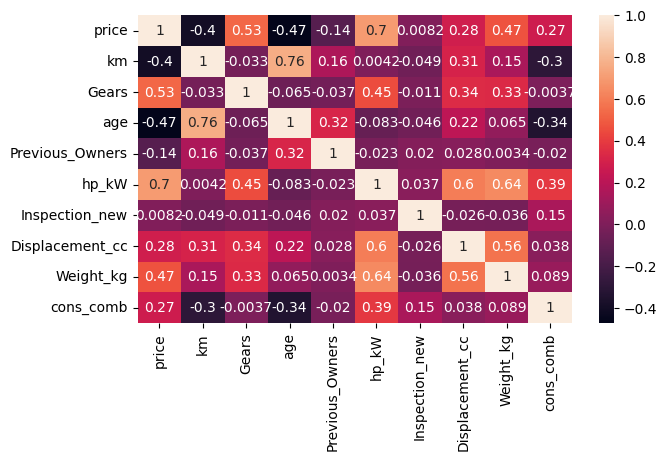

In [15]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

In [16]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [17]:
df.drop(index=[2614], inplace =True)

In [18]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [19]:
df.Extras.apply(lambda x: len(x.split(',')))

0        3
1        4
2        2
3        3
4        4
        ..
15910    2
15911    3
15912    1
15913    2
15914    2
Name: Extras, Length: 15914, dtype: int64

In [20]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [21]:
df.Extras.unique()

array([ 3,  4,  2,  1,  6,  5,  7,  8, 10,  9], dtype=int64)

In [22]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Comfort_Convenience           : ['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'
 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop 

In [24]:
feature_imp=["age", "hp_kW", "km", "Gearing_Type", 'make_model']

In [25]:
X=df[feature_imp]
y=df['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gearing_Type', 'make_model'], dtype='object')

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [31]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [32]:
X_train.sample(3)

,age,hp_kW,km,Gearing_Type,make_model
9375,2.0,66.0,"42,619.0",Manual,Opel Corsa
538,3.0,70.0,"31,284.0",Manual,Audi A1
7264,1.0,110.0,"25,204.0",Manual,Opel Astra


In [33]:
X_train=column_trans.fit_transform(X_train)

In [34]:
X_test=column_trans.transform(X_test)

In [37]:
X_train

array([[1.00e+00, 5.00e+00, 0.00e+00, 5.60e+01, 1.00e+01],
       [1.00e+00, 2.00e+00, 3.00e+00, 8.10e+01, 1.39e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 8.50e+01, 1.80e+04],
       ...,
       [0.00e+00, 3.00e+00, 0.00e+00, 6.60e+01, 3.55e+02],
       [0.00e+00, 4.00e+00, 3.00e+00, 1.25e+02, 2.32e+05],
       [0.00e+00, 1.00e+00, 3.00e+00, 8.10e+01, 9.70e+04]])

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = rf_model.predict(X_test)

In [70]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [71]:
eval_metrics(y_test,y_pred)

 r2_score: 0.9292870063447 
 mae: 1135.4803596175075 
 mse: 3540486.1904940335 
 rmse: 1881.617971452769


In [72]:
import pickle
pickle.dump(rf_model, open('rf_model_new', 'wb'))

In [73]:
pickle.dump(column_trans, open('transformer', 'wb'))

# Linear Regression

In [74]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
y_pred2 = lm.predict(X_test)

In [77]:
eval_metrics(y_test,y_pred2)

 r2_score: -6760542387.6655035 
 mae: 378712393.24669784 
 mse: 3.384895155761201e+17 
 rmse: 581798518.0250291


In [78]:
import pickle
pickle.dump(lm, open('LM_model_new', 'wb'))

# Ridge

In [63]:
from sklearn.linear_model import Ridge
Rd = Ridge()
Rd.fit(X_train_scaled, y_train)

Ridge()

In [64]:
y_pred3 = Rd.predict(X_test)

In [81]:
eval_metrics(y_test,y_pred3)

 r2_score: -6531454105.443918 
 mae: 372232056.5324114 
 mse: 3.2701943267221626e+17 
 rmse: 571856129.3474227


In [79]:
import pickle
pickle.dump(Rd, open('Rd_model_new', 'wb'))

# Lasso

In [80]:
from sklearn.linear_model import Lasso
Ls = Lasso()
Ls.fit(X_train_scaled, y_train)

Lasso()

In [84]:
y_pred4 = Ls.predict(X_test)

In [85]:
eval_metrics(y_test,y_pred4)

 r2_score: -6591683557.310231 
 mae: 373942488.4177701 
 mse: 3.300350247377025e+17 
 rmse: 574486748.9661554


In [86]:
import pickle
pickle.dump(Ls, open('Ls_model_new', 'wb'))

# Deployement

In [96]:
model_1 = pickle.load(open('rf_model_new', 'rb'))

In [97]:
model_2 = pickle.load(open('LM_model_new', 'rb'))

In [98]:
model_3 = pickle.load(open('Rd_model_new', 'rb'))

In [99]:
model_4 = pickle.load(open('Ls_model_new', 'rb'))

In [88]:
transformer_1 = pickle.load(open('transformer', 'rb'))

In [89]:
columns=list(X.columns)
columns

['age', 'hp_kW', 'km', 'Gearing_Type', 'make_model']

In [90]:
my_dict = {
    "age": 2,
    "hp_kW": 105,
    "km": 100000,
    "Gearing_Type":"Automatic",
    "make_model": 'Audi A3'
}

In [91]:
df = pd.DataFrame.from_dict([my_dict])

In [92]:
df2 = transformer_1.transform(df)

In [93]:
pd.Series(df2[0])

0         0.0
1         1.0
2         2.0
3       105.0
4   100,000.0
dtype: float64

In [94]:
prediction = model_1.predict(df2)
print(prediction)

[19088.25]


In [95]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €19088. 


In [100]:
prediction = model_2.predict(df2)
print(prediction)

[-1.20385358e+09]


In [101]:
prediction = model_3.predict(df2)
print(prediction)

[-1.18328631e+09]


In [102]:
prediction = model_4.predict(df2)
print(prediction)

[-1.18873103e+09]
